In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.regression.linear_model import RegressionResults

# 線形回帰を実施する関数
def perform_linear_regression(data, explanatory_vars, dependent_var, min_data_count):
    results = {}
    plots = {}

    for date in data['Date'].unique():
        data_date = data[data['Date'] == date]
        for sector in data['Sector'].unique():
            data_sector = data_date[data_date['Sector'] == sector]

            if len(data_sector) >= min_data_count:
                X = data_sector[explanatory_vars]
                y = data_sector[dependent_var]
                X = sm.add_constant(X)  # 定数項の追加

                model = sm.OLS(y, X).fit()
                results[(date, sector)] = model
                
                # サブプロットの作成
                fig, ax = plt.subplots(figsize=(6, 4))
                ax.scatter(X[explanatory_vars[0]], y, color='blue')
                ax.plot(X[explanatory_vars[0]], model.predict(X), color='red')
                ax.set_title(f"{sector} - {date.strftime('%Y-%m')}")
                ax.set_xlabel(explanatory_vars[0])
                ax.set_ylabel(dependent_var)
                plots[(date, sector)] = fig

    return results, plots

# 説明変数と被説明変数を指定
explanatory_vars = ['Credit_Rating', 'Credit_Spread', 'Remaining_Years', 'Coupon_Rate', 'Issue_Amount']
dependent_var = 'Total_Return'

# 線形回帰を実行（各セクターで最低50のデータポイントが必要）
results, plots = perform_linear_regression(sample_data, explanatory_vars, dependent_var, min_data_count=50)

# 最初の結果のサマリーを表示（例）
first_key = list(results.keys())[0]
print(results[first_key].summary())


In [ ]:
# 線形回帰を実施する関数（修正版）
def perform_linear_regression_fixed(data, explanatory_vars, dependent_var, min_data_count):
    results = {}

    for date in data['Date'].unique():
        data_date = data[data['Date'] == date]
        for sector in data['Sector'].unique():
            data_sector = data_date[data_date['Sector'] == sector]

            if len(data_sector) >= min_data_count:
                X = data_sector[explanatory_vars]
                y = data_sector[dependent_var]
                X = sm.add_constant(X)  # 定数項の追加

                model = sm.OLS(y, X).fit()
                results[(date, sector)] = model

    return results

# 線形回帰を実行（修正版）
results_fixed = perform_linear_regression_fixed(sample_data, explanatory_vars, dependent_var, min_data_count=50)

# 最初の結果のサマリーを表示（例）
first_key = list(results_fixed.keys())[0]
print(results_fixed[first_key].summary())


In [ ]:
# 結果をExcelに出力する関数（修正版）
def output_results_to_excel_fixed(results, file_name):
    # 新しいワークブックを作成
    wb = Workbook()
    
    # 各セクターごとにシートを作成
    for key in results.keys():
        date, sector = key
        model = results[key]
        
        # シート名を設定（セクター名と日付）
        sheet_name = f"{sector} {pd.Timestamp(date).strftime('%Y-%m')}"
        if sheet_name not in wb.sheetnames:
            ws = wb.create_sheet(title=sheet_name)
        else:
            ws = wb[sheet_name]

        # 結果をシートに書き込む
        ws.append(["Coefficients"])
        for param in model.params.index:
            ws.append([param, model.params[param]])

        ws.append([])
        ws.append(["P-values"])
        for param in model.pvalues.index:
            ws.append([param, model.pvalues[param]])

        ws.append([])
        ws.append(["R-squared", model.rsquared])
        ws.append(["Adj. R-squared", model.rsquared_adj])

    # ファイルに保存
    with BytesIO() as f:
        wb.save(f)
        f.seek(0)
        with open(file_name, 'wb') as out_file:
            out_file.write(f.read())

# 結果をExcelファイルに出力（修正版）
output_results_to_excel_fixed(results_fixed, "regression_results.xlsx")

"Excelファイル 'regression_results.xlsx' が生成されました。"


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# サンプルデータの生成
np.random.seed(0)

# 例示された属性に基づいてデータフレームを生成
def generate_sample_data(num_records=1000, start_date='2023-01-31', end_date='2023-12-31'):
    # 月末の日付を生成
    date_range = pd.date_range(start_date, end_date, freq='M')
    
    # サンプルデータの生成
    data = {
        'Date': np.random.choice(date_range, num_records),
        'Sector': np.random.choice(['Sector A', 'Sector B', 'Sector C'], num_records),
        'CreditRating': np.random.randint(1, 10, num_records),
        'CreditSpread': np.random.uniform(0, 5, num_records),
        'Maturity': np.random.uniform(1, 10, num_records),
        'CouponRate': np.random.uniform(0, 10, num_records),
        'CouponFlag': np.random.choice([0, 1], num_records),
        'IssueAmount': np.random.uniform(100000, 1000000, num_records),
        'TotalReturn': np.random.uniform(-10, 10, num_records),
        'SpreadReturn': np.random.uniform(-5, 5, num_records)
    }

    return pd.DataFrame(data)

# サンプルデータの生成
sample_data = generate_sample_data()
sample_data.head()


,Date,Sector,CreditRating,CreditSpread,Maturity,CouponRate,CouponFlag,IssueAmount,TotalReturn,SpreadReturn
0,2023-06-30,Sector A,1,2.861585,4.981742,2.304761,0,526748.554158,8.749205,-4.948832
1,2023-01-31,Sector B,4,4.474349,5.446833,5.351480,0,643892.415242,6.730911,2.587635
2,2023-04-30,Sector B,7,0.881408,8.742531,0.659547,0,107067.456413,9.213850,-4.916623
3,2023-12-31,Sector C,4,1.398394,6.651255,5.537142,1,720126.121673,-7.682278,-0.367850
4,2023-04-30,Sector A,1,2.908399,7.971098,8.544654,1,113901.467211,9.789469,-2.944533


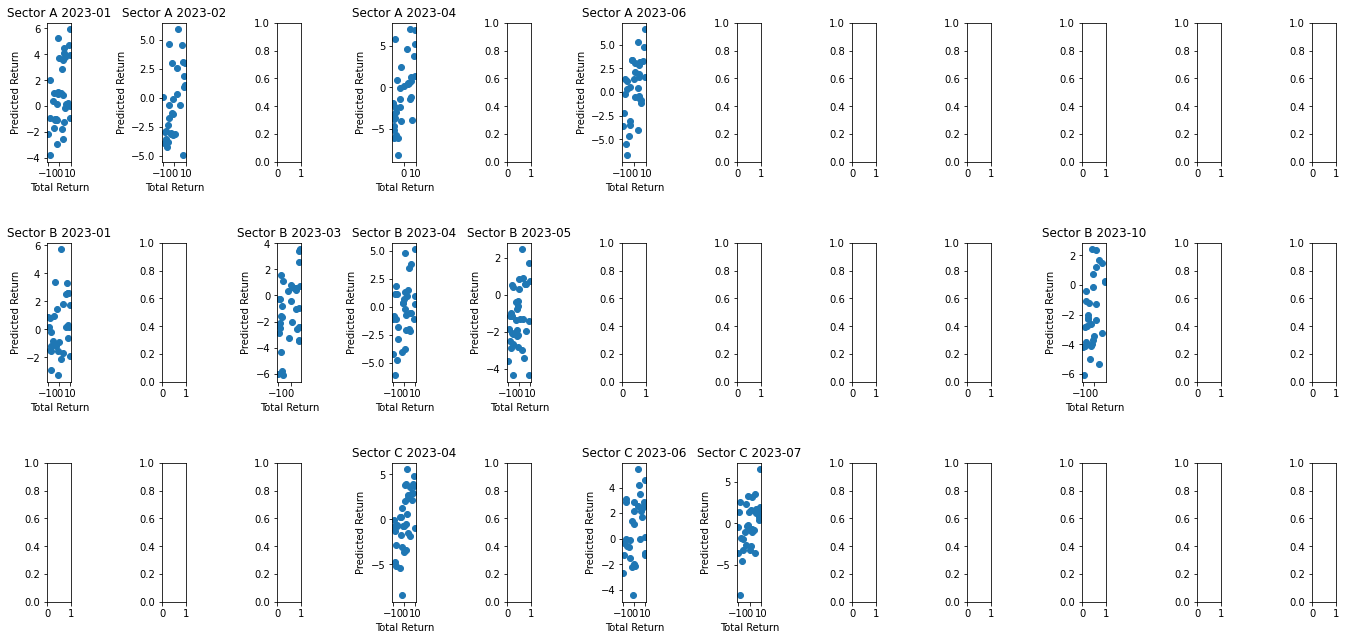

[((Period('2023-01', 'M'), 'Sector A'),
  {'R-squared': 0.2029998519402314,
   't-values': const           0.770034
   CreditRating   -2.022287
   CreditSpread   -0.429143
   Maturity        1.611381
   CouponRate     -0.856159
   CouponFlag     -0.217166
   IssueAmount    -0.086544
   SpreadReturn    0.739596
   dtype: float64}),
 ((Period('2023-01', 'M'), 'Sector B'),
  {'R-squared': 0.10025552767240631,
   't-values': const           0.108249
   CreditRating    0.618703
   CreditSpread    0.535830
   Maturity       -0.810736
   CouponRate      0.107382
   CouponFlag     -0.783865
   IssueAmount    -0.017545
   SpreadReturn    0.424349
   dtype: float64}),
 ((Period('2023-02', 'M'), 'Sector A'),
  {'R-squared': 0.2631052307889984,
   't-values': const          -1.407353
   CreditRating    0.784408
   CreditSpread    0.205873
   Maturity        1.646004
   CouponRate      1.048402
   CouponFlag      0.364341
   IssueAmount    -0.677276
   SpreadReturn    1.518133
   dtype: float64}),


In [2]:
def perform_regression_and_plot(data, explanatory_vars, min_data_count=30):
    # 各月とセクターごとにデータを分ける
    grouped_data = data.groupby([data['Date'].dt.to_period('M'), 'Sector'])

    # 結果を格納するための辞書
    regression_results = {}

    # プロットの設定
    fig, axes = plt.subplots(nrows=len(data['Sector'].unique()), ncols=12, figsize=(20, 10))
    fig.tight_layout(pad=6.0)

    for (date, sector), group in grouped_data:
        if len(group) >= min_data_count:
            X = group[explanatory_vars]
            y = group['TotalReturn']
            
            # 線形回帰モデルの構築とフィット
            model = sm.OLS(y, sm.add_constant(X)).fit()
            
            # 結果の格納
            regression_results[(date, sector)] = {
                'R-squared': model.rsquared,
                't-values': model.tvalues
            }

            # プロット
            ax = axes[data['Sector'].unique().tolist().index(sector), date.month - 1]
            ax.scatter(y, model.predict(sm.add_constant(X)))
            ax.set_title(f'{sector} {date}')
            ax.set_xlabel('Total Return')
            ax.set_ylabel('Predicted Return')

    return regression_results, plt

# 説明変数のリスト
explanatory_vars = ['CreditRating', 'CreditSpread', 'Maturity', 'CouponRate', 'CouponFlag', 'IssueAmount', 'SpreadReturn']

# 関数の実行
regression_results, plot = perform_regression_and_plot(sample_data, explanatory_vars)
plot.show()

# 最初の数個の結果を表示
list(regression_results.items())[:5]


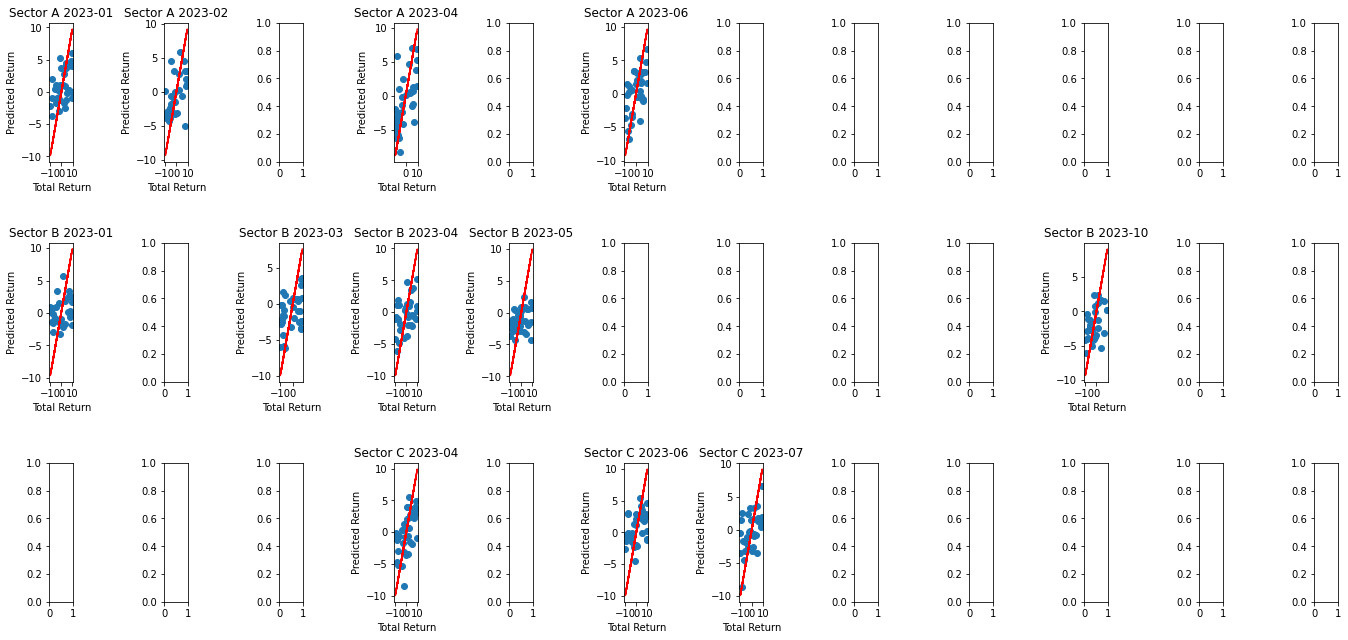

[((Period('2023-01', 'M'), 'Sector A'),
  {'R-squared': 0.2029998519402314,
   't-values': const           0.770034
   CreditRating   -2.022287
   CreditSpread   -0.429143
   Maturity        1.611381
   CouponRate     -0.856159
   CouponFlag     -0.217166
   IssueAmount    -0.086544
   SpreadReturn    0.739596
   dtype: float64}),
 ((Period('2023-01', 'M'), 'Sector B'),
  {'R-squared': 0.10025552767240631,
   't-values': const           0.108249
   CreditRating    0.618703
   CreditSpread    0.535830
   Maturity       -0.810736
   CouponRate      0.107382
   CouponFlag     -0.783865
   IssueAmount    -0.017545
   SpreadReturn    0.424349
   dtype: float64}),
 ((Period('2023-02', 'M'), 'Sector A'),
  {'R-squared': 0.2631052307889984,
   't-values': const          -1.407353
   CreditRating    0.784408
   CreditSpread    0.205873
   Maturity        1.646004
   CouponRate      1.048402
   CouponFlag      0.364341
   IssueAmount    -0.677276
   SpreadReturn    1.518133
   dtype: float64}),


In [3]:
def perform_regression_and_plot_with_predictions(data, explanatory_vars, min_data_count=30):
    # 各月とセクターごとにデータを分ける
    grouped_data = data.groupby([data['Date'].dt.to_period('M'), 'Sector'])

    # 結果を格納するための辞書
    regression_results = {}

    # プロットの設定
    fig, axes = plt.subplots(nrows=len(data['Sector'].unique()), ncols=12, figsize=(20, 10))
    fig.tight_layout(pad=6.0)

    for (date, sector), group in grouped_data:
        if len(group) >= min_data_count:
            X = group[explanatory_vars]
            y = group['TotalReturn']
            
            # 線形回帰モデルの構築とフィット
            model = sm.OLS(y, sm.add_constant(X)).fit()
            
            # 結果の格納
            regression_results[(date, sector)] = {
                'R-squared': model.rsquared,
                't-values': model.tvalues
            }

            # プロット（実際の値と予測値）
            ax = axes[data['Sector'].unique().tolist().index(sector), date.month - 1]
            ax.scatter(y, model.predict(sm.add_constant(X)))
            ax.plot(y, y, color='red')  # 完全な予測を表す赤い線
            ax.set_title(f'{sector} {date}')
            ax.set_xlabel('Total Return')
            ax.set_ylabel('Predicted Return')

    return regression_results, plt

# 関数の実行
regression_results_with_predictions, plot_with_predictions = perform_regression_and_plot_with_predictions(sample_data, explanatory_vars)
plot_with_predictions.show()

# 最初の数個の結果を表示
list(regression_results_with_predictions.items())[:5]


In [ ]:
def perform_regression_and_plot_with_r_squared(data, explanatory_vars, min_data_count=30):
    # 各月とセクターごとにデータを分ける
    grouped_data = data.groupby([data['Date'].dt.to_period('M'), 'Sector'])

    # 結果を格納するための辞書
    regression_results = {}

    # プロットの設定
    fig, axes = plt.subplots(nrows=len(data['Sector'].unique()), ncols=12, figsize=(20, 10))
    fig.tight_layout(pad=6.0)

    for (date, sector), group in grouped_data:
        if len(group) >= min_data_count:
            X = group[explanatory_vars]
            y = group['TotalReturn']
            
            # 線形回帰モデルの構築とフィット
            model = sm.OLS(y, sm.add_constant(X)).fit()
            r_squared = model.rsquared  # 決定係数

            # 結果の格納
            regression_results[(date, sector)] = {
                'R-squared': r_squared,
                't-values': model.tvalues
            }

            # プロット（実際の値と予測値）
            ax = axes[data['Sector'].unique().tolist().index(sector), date.month - 1]
            scatter = ax.scatter(y, model.predict(sm.add_constant(X)))

            # 予測線のプロット
            x_for_plot = np.linspace(min(y), max(y), 100)
            y_predicted_for_plot = model.predict(sm.add_constant(pd.DataFrame({var: x_for_plot for var in explanatory_vars})))
            ax.plot(x_for_plot, y_predicted_for_plot, color='red')  # 予測線を赤い線でプロット

            # 決定係数を凡例に追加
            ax.legend([scatter], [f'R²: {r_squared:.2f}'])

            ax.set_title(f'{sector} {date}')
            ax.set_xlabel('Total Return')
            ax.set_ylabel('Predicted Return')

    return regression_results, plt

# 関数の実行
regression_results_with_r_squared, plot_with_r_squared = perform_regression_and_plot_with_r_squared(sample_data, explanatory_vars)
plot_with_r_squared.show()

# 最初の数個の結果を表示
list(regression_results_with_r_squared.items())[:5]


In [ ]:
def perform_regression_and_plot_adjusted(data, explanatory_vars, min_data_count=30):
    # 各月とセクターごとにデータを分ける
    grouped_data = data.groupby([data['Date'].dt.to_period('M'), 'Sector'])

    # 結果を格納するための辞書
    regression_results = {}

    # プロットの設定
    fig, axes = plt.subplots(nrows=len(data['Sector'].unique()), ncols=12, figsize=(20, 10))
    fig.tight_layout(pad=6.0)

    for (date, sector), group in grouped_data:
        if len(group) >= min_data_count:
            X = group[explanatory_vars]
            y = group['TotalReturn']
            
            # 線形回帰モデルの構築とフィット
            model = sm.OLS(y, sm.add_constant(X)).fit()
            
            # 結果の格納
            regression_results[(date, sector)] = {
                'R-squared': model.rsquared,
                't-values': model.tvalues
            }

            # プロット（実際の値と予測値）
            ax = axes[data['Sector'].unique().tolist().index(sector), date.month - 1]
            ax.scatter(y, model.predict(sm.add_constant(X)))

            # 予測線のプロット
            # データ数に合わせて点の数を調整
            num_points = len(y)
            x_for_plot = np.linspace(min(y), max(y), num_points)
            y_predicted_for_plot = model.predict(sm.add_constant(pd.DataFrame({var: x_for_plot for var in explanatory_vars})))
            ax.plot(x_for_plot, y_predicted_for_plot, color='red')  # 予測線を赤い線でプロット

            ax.set_title(f'{sector} {date}')
            ax.set_xlabel('Total Return')
            ax.set_ylabel('Predicted Return')

    return regression_results, plt

# 関数の実行（修正版）
regression_results_adjusted, plot_adjusted = perform_regression_and_plot_adjusted(sample_data, explanatory_vars_without_sector)
plot_adjusted.show()

# 最初の数個の結果を表示
list(regression_results_adjusted.items())[:5]


In [ ]:
def perform_regression_and_plot_estimations(data, explanatory_vars, min_data_count=30):
    # 各月とセクターごとにデータを分ける
    grouped_data = data.groupby([data['Date'].dt.to_period('M'), 'Sector'])

    # 結果を格納するための辞書
    regression_results = {}

    # プロットの設定
    fig, axes = plt.subplots(nrows=len(data['Sector'].unique()), ncols=12, figsize=(20, 10))
    fig.tight_layout(pad=6.0)

    for (date, sector), group in grouped_data:
        if len(group) >= min_data_count:
            X = group[explanatory_vars]
            y = group['TotalReturn']
            
            # 線形回帰モデルの構築とフィット
            model = sm.OLS(y, sm.add_constant(X)).fit()
            
            # 結果の格納
            regression_results[(date, sector)] = {
                'R-squared': model.rsquared,
                't-values': model.tvalues
            }

            # プロット（実際の値とモデルによる推計値）
            ax = axes[data['Sector'].unique().tolist().index(sector), date.month - 1]
            ax.scatter(y, model.predict(sm.add_constant(X)), alpha=0.7)
            ax.plot(y, y, color='red', alpha=0.7)  # 実際の値と一致する場合の線

            ax.set_title(f'{sector} {date}')
            ax.set_xlabel('Total Return')
            ax.set_ylabel('Predicted Return')

    return regression_results, plt

# 関数の実行
regression_results_estimations, plot_estimations = perform_regression_and_plot_estimations(sample_data, explanatory_vars_without_sector)
plot_estimations.show()

# 最初の数個の結果を表示
list(regression_results_estimations.items())[:5]


In [ ]:
def handle_missing_values(df, columns, method='delete'):
    """
    指定されたカラムのリスト内のデータに対して、欠損値を削除するか、平均値で補完する関数。

    :param df: Pandas DataFrame
    :param columns: 欠損値処理を行うカラムのリスト
    :param method: 欠損値処理の方法（'delete' または 'fill'）
    :return: 処理後のDataFrame
    """
    df_modified = df.copy()
    
    if method == 'delete':
        # 指定されたカラムで欠損値を含む行を削除
        df_modified.dropna(subset=columns, inplace=True)
    elif method == 'fill':
        # 指定されたカラムの欠損値を平均値で補完
        for column in columns:
            df_modified[column].fillna(df_modified[column].mean(), inplace=True)

    return df_modified

# 使用例
# columns_list = ['Column1', 'Column2', ...]  # 欠損値処理を行うカラムのリスト
# updated_df = handle_missing_values(sample_data, columns_list, method='fill')
# updated_df.head()
